<a href="https://colab.research.google.com/github/noisebridge/deep-learning-meetup/blob/main/MNIST_w_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Link to this notebook: https://colab.research.google.com/drive/1yIrHozKq0iOZCvmy8vMMDM9Jpi43D2eN?usp=sharing

# Based on: https://keras.io/examples/vision/mnist_convnet/

# https://bugz-mnist.herokuapp.com/
# https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html

![classification vs regression](https://www.researchgate.net/profile/Sami-Belkacem/publication/350993856/figure/fig2/AS:1014557191450626@1618900692681/Classification-vs-Regression.jpg)

e.g. dog vs cat, or person no person. regression: height/weight or edges of bounding boxes

![binary vs multiclass classification](https://media.geeksforgeeks.org/wp-content/uploads/classification-1.png)

![MNIST](https://www.researchgate.net/profile/Kofi-Appiah-2/publication/252028600/figure/fig2/AS:298067136925718@1448076151592/Some-samples-of-the-MNIST-database.png)

In [ ]:
# To execute a cell, put the cursor in it and press ctrl+enter or ctrl+return

In [ ]:
# REQUIRED: imports for keras/tensorflow neural network development
import numpy as np
np.set_printoptions(linewidth=200, precision=2, suppress=True)
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# REQUIRED: imports for charting, make charts appear in this notebook inline
%matplotlib inline
import matplotlib.pyplot as plt

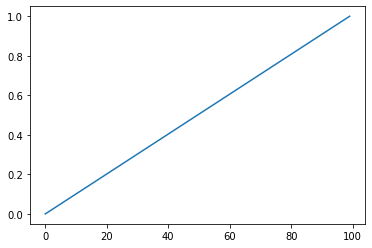

In [ ]:
# OPTIONAL: let's see a chart
_ = plt.plot(np.linspace(0.0, 1.0, 100)) 
# _ is a variable of no particular name
# - = ... just helps hide the untidy result

In [ ]:
# REQUIRED: load the dataset, checkout the "shape"
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# NB arrays and actually cubes of numbers, e.g. 60000 x 28 x 28 and 60000 (x 1)
# we have a training and test sets, with x and y for each
# job of neural network is to predict y after seeing x, i.e. y = f(x)
print(f'x_train.shape {x_train.shape}')
print(f'y_train.shape {y_train.shape}')
print(f'x_test.shape {x_test.shape}')
print(f'y_test.shape {y_test.shape}')

x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)


![tensor shapes](https://miro.medium.com/max/931/1*XIOuiEjfXAXOFa0-w2_pTw.jpeg)

In [ ]:
# OPTIONAL: array shapes 1D (4 [x 1])
x = np.array([1, 2, 3, 4])
x, x.shape

(array([1, 2, 3, 4]), (4,))

In [ ]:
# OPTIONAL: array shape 2D (3 x3)
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x, x.shape

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]), (3, 3))

In [ ]:
# OPTIONAL: array shape 2D (3 x3)
x = np.array([[[1, 2], [4, 5]], [[6, 7], [8, 9]]])
x, x.shape

(array([[[1, 2],
         [4, 5]],
 
        [[6, 7],
         [8, 9]]]), (2, 2, 2))

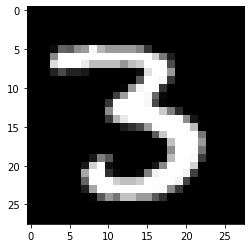

In [ ]:
# OPTIONAL: check out one image
index = 12
image_n = x_train[index] # an image in the 60K training data set
_ = plt.imshow(image_n, cmap='gray', vmin=0, vmax=255)

In [ ]:
# OPTIONAL: let's see the numbers representing that image (the "x" in y = f(x))
image_n

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  12,  99,  91, 142, 155, 246, 182, 155, 155, 155, 155, 131,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 138, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 210, 122,  33,   0

In [ ]:
# OPTIONAL: and the expected label (the "y" in y = f("x"))
y_train[index]

3

In [ ]:
# REQUIRED: scale the images into [0..1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# OPTIONAL: see the scaled image values
x_train[index][:14, :14]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.05, 0.39, 0.36, 0.56, 0.61, 0.96, 0.71, 0.61, 0.61, 0.61, 0.61],
       [0.  , 0.  , 0.  , 0.54, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.  , 0.  , 0.  , 0.86, 1.  , 1.  , 1.  , 0.92, 0.74, 0.74, 0.74, 0.74, 0.59, 0.74],
       [0.  , 0.  , 0.  , 0.14, 0.29, 0.14, 0.14, 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [ ]:
# OPTIONAL array slicing
x = np.array([1, 2, 3, 5, 6])
print(x)
print(x[3:]) # everything starting from index 3 until end of array
print(x[:3]) # everything up until index 3
print(x[:-2]) # everything until the second last element of array

[1 2 3 5 6]
[5 6]
[1 2 3]
[1 2 3]


In [ ]:
# REQUIRED: expand the dimensions of image arrays
# turn 60000 x 28 x 28 -> 60000 x 28 x 28 x 1
# 60000 samples, 28 pixels, by 28 pixels by 1 dimension/feature (the lightness of the pixel)
print("x_train shape before:", x_train.shape)
x_train = np.expand_dims(x_train, -1) # -1 means all the current dimensions
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape before: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# OPTIONAL. Remind ourselves what the "y" in y = f(x), the label looks like
y_train[index]

3

In [ ]:
# REQUIRED: convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000, 10)

In [ ]:
# OPTIONAL check out "one hot" encoding
y_train[index]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# OPTIONAL: one hot again
labels = np.arange(10) # 0, 1, 2...9
encoded_labels = keras.utils.to_categorical(labels, num_classes)
for label, encoded_label in zip(labels, encoded_labels):
  print(label, encoded_label)

0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# REQUIRED
# 28 pixels, by 28 pixels by 1 dimension/feature (the lightness of the pixel)
input_shape = (28, 28, 1)

# keras.Sequential a stack of layers, passing information from one layer to the next
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),

        layers.Dropout(0.5),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)            

In [ ]:
# OPTIONAL: rebuild layer by layer
input_shape = (28, 28, 1)

# keras.Sequential a stack of layers, passing information from one layer to the next
model = keras.Sequential(
    [
        # the same shape as the image
        # actual data input will be B x H x W x D
        # B a batch of images, say 32
        # H & W, height and width, both 28
        # D - dimension, 1, brightness of pixel
        keras.Input(shape=input_shape),
     
        # "scan" convolution over image
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
     
        # choose max from each block
        layers.MaxPooling2D(pool_size=(2, 2)),
     

        # repeat similar pattern of layers
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        # 1D vector
        layers.Flatten(), # 64 x 25
     
        # improve training performance (Hinton?)
        layers.Dropout(0.5),
     
        # "probabilty" classifier layer
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# make a fake dataset B x H x W x D
fake_data = np.random.rand(32, 28, 28, 1)

# get the model to predict, do the forward pass, calculate y = f(x)
# and check out the shape of the result
model.predict(fake_data).shape


(32, 10)

![dense network](https://freecontent.manning.com/wp-content/uploads/duerr_NNA_01.png)

![convolution](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAO04Eovo5TQ3pCda4AKNdX_6pEDHBQcs_Qw&usqp=CAU)

![architecture](http://pytorch.org/tutorials/_images/mnist.png)

![maxpool](https://www.researchgate.net/profile/Vijaya-Kumar-r/publication/338429324/figure/fig4/AS:855992673783810@1581095965438/padding-pads-of-an-image-with-zero-Second-layer-in-CNN--is-the--pooling-but-actually-we.jpg)

In [ ]:
# REQUIRED! compile and train the model
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 41s 97ms/step - loss: 0.1902 - accuracy: 0.9441 - val_loss: 0.0634 - val_accuracy: 0.9817
Epoch 2/10
422/422 [==============================] - 42s 99ms/step - loss: 0.1171 - accuracy: 0.9645 - val_loss: 0.0511 - val_accuracy: 0.9862
Epoch 3/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0960 - accuracy: 0.9704 - val_loss: 0.0385 - val_accuracy: 0.9885
Epoch 4/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0877 - accuracy: 0.9729 - val_loss: 0.0417 - val_accuracy: 0.9860
Epoch 5/10
422/422 [==============================] - 41s 96ms/step - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0424 - val_accuracy: 0.9868
Epoch 6/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0716 - accuracy: 0.9775 - val_loss: 0.0360 - val_accuracy: 0.9887
Epoch 7/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0631 - accuracy: 0.9798 - val_loss: 0.0303 - val_accuracy:

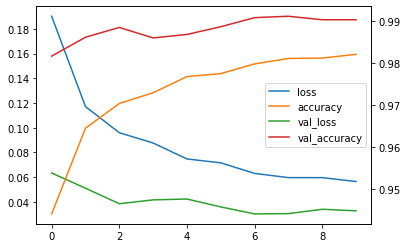

In [ ]:
# OPTIONAL: but recommended. Check the learning curves/stats/metrics/history

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
count = 0
lines = []
for name, values in history.history.items():
  ax = ax1 if name.endswith('loss') else ax2
  line = ax.plot(values, label=name, c=colors[count])
  lines.extend(line)
  count += 1
labels = [line.get_label() for line in lines]
_ = ax1.legend(lines, labels, loc='center right')

In [ ]:
# OPTIONAL: evaulate whole test set
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03669443354010582
Test accuracy: 0.9891999959945679


In [ ]:
# OPTIONAL: see 1 prediction
one_image_batch = np.expand_dims(x_train[index], 0)
one_image_batch.shape
yhat = model.predict(one_image_batch)
yhat
# np.argmax(yhat)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# OPTIONAL try to overfit

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),

        layers.Dropout(0.5),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

batch_size = 128
epochs = 40

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = model2.fit(x_test, y_test, batch_size=batch_size, epochs=epochs, validation_split=0.9)


Epoch 1/40
8/8 [==============================] - 3s 354ms/step - loss: 29.7927 - accuracy: 0.2082 - val_loss: 3.0442 - val_accuracy: 0.5938
Epoch 2/40
8/8 [==============================] - 2s 336ms/step - loss: 6.8842 - accuracy: 0.4595 - val_loss: 1.4415 - val_accuracy: 0.7496
Epoch 3/40
8/8 [==============================] - 2s 335ms/step - loss: 2.7578 - accuracy: 0.6396 - val_loss: 0.8752 - val_accuracy: 0.8025
Epoch 4/40
8/8 [==============================] - 2s 333ms/step - loss: 1.6077 - accuracy: 0.7007 - val_loss: 0.6699 - val_accuracy: 0.8340
Epoch 5/40
8/8 [==============================] - 2s 335ms/step - loss: 1.2457 - accuracy: 0.7227 - val_loss: 0.5407 - val_accuracy: 0.8487
Epoch 6/40
8/8 [==============================] - 2s 337ms/step - loss: 0.9684 - accuracy: 0.7648 - val_loss: 0.4922 - val_accuracy: 0.8596
Epoch 7/40
8/8 [==============================] - 2s 334ms/step - loss: 0.6875 - accuracy: 0.8108 - val_loss: 0.4511 - val_accuracy: 0.8708
Epoch 8/40
8/8 [===

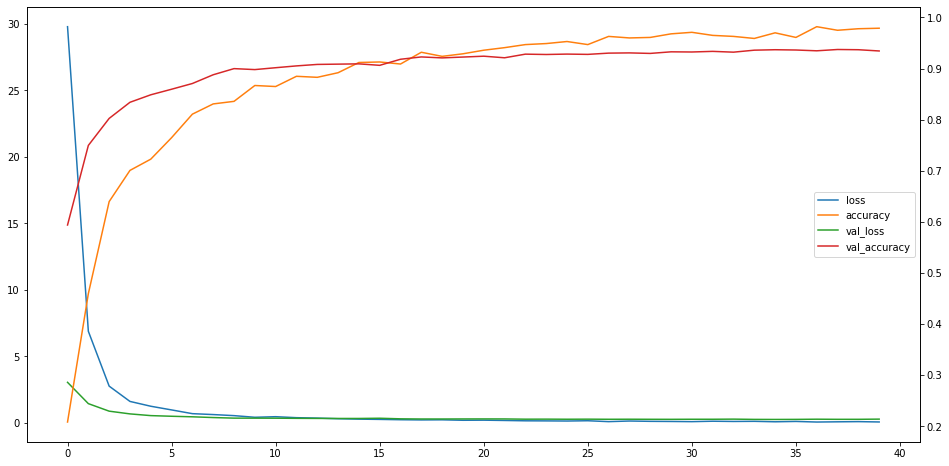

In [ ]:
# OPTIONAL visualize overfitting

fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
ax2 = ax1.twinx()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
count = 0
lines = []
for name, values in history2.history.items():
  ax = ax1 if name.endswith('loss') else ax2
  line = ax.plot(values, label=name, c=colors[count])
  lines.extend(line)
  count += 1
labels = [line.get_label() for line in lines]
_ = ax1.legend(lines, labels, loc='center right')

In [ ]:
# OPTIONAL: categorical crossentropy loss

import tensorflow as tf
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# y_pred = tf.convert_to_tensor(y_true, dtype=tf.float32)
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

1.1769392

In [ ]:
# fashion MNIST
# omniglot